<a href="https://colab.research.google.com/github/ykitaguchi77/ImageProcessing/blob/master/Eye_crop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#顔の画像から目を検出して切り抜くスクリプト
・Haarcascade_eyeを使用<br>
・目が検出できないものは飛ばす

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import time
import os
import copy
import pandas as pd

import glob
import random
from PIL import Image
%matplotlib inline

#サポートパッチのインポート
from google.colab.patches import cv2_imshow
import cv2

plt.ion()   # interactive mode
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

#Google colabをマウント

In [91]:
'''
変換前
--in-----1-----abc.jpg
      |    |--def.jpg
      |
      |-2-----ghi.jpg     
           |--jkl.jpg

変換後
--out-------1.jpg
        |--2,jpg        
        |--3.jpg
        |--4.jpg
'''

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
#元画像フォルダ
in_path = '/content/drive/My Drive/Deep_learning/eyelid_images/in/'

#保存先フォルダ
out_path = '/content/drive/My Drive/Deep_learning/eyelid_images/out/'

#Haarcascadeを指定

In [0]:
# カスケードファイルのパス
eye_cascade_path = '/content/drive/My Drive/Deep_learning/haarcascade_eye.xml'

# カスケード分類器の特徴量取得
eye_cascade = cv2.CascadeClassifier(eye_cascade_path)

In [95]:
images = glob.glob(in_path + '*/*')

k=0
for i in images:
    img = cv2.imread(i)
    img2 = img.copy()

    # 画像グレースケール化
    grayscale_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    #300pix以上のもので目に見えるものを抽出
    eye_list = eye_cascade.detectMultiScale(grayscale_img, minSize=(300, 300))

    # 眼検出判定
    if len(eye_list) >= 1:
        print('目が' + str(len(eye_list)) +'個検出されました')
    else:
        print("eye detection error")
    
    #画像の切り抜きと保存（連番にする）
   
    for (ex, ey, ew, eh) in eye_list:
        print("[ex,ey] = %d,%d [ew,eh] = %d,%d" %(ex, ey, ew, eh))
        cv2.rectangle(img2, (ex, ey), (ex + ew, ey + eh), (0, 255, 0), 2)
        img_cropped = img[int(ey-0.1*eh): int(ey+1.1*eh), int(ex-0.1*ew): int(ex+1.1*ew)]
        cv2.imwrite('/content/drive/My Drive/Deep_learning/eyelid_images/out/'+str(k+1)+'.jpg', img_cropped)    
        k+=1

目が1個検出されました
[ex,ey] = 190,385 [ew,eh] = 590,590
eye detection error
目が2個検出されました
[ex,ey] = 1245,287 [ew,eh] = 565,565
[ex,ey] = 131,267 [ew,eh] = 710,710
目が2個検出されました
[ex,ey] = 1164,378 [ew,eh] = 543,543
[ex,ey] = 141,367 [ew,eh] = 579,579
目が2個検出されました
[ex,ey] = 134,369 [ew,eh] = 467,467
[ex,ey] = 1106,338 [ew,eh] = 554,554
目が2個検出されました
[ex,ey] = 1257,292 [ew,eh] = 565,565
[ex,ey] = 202,317 [ew,eh] = 593,593
eye detection error
目が2個検出されました
[ex,ey] = 154,302 [ew,eh] = 584,584
[ex,ey] = 1210,300 [ew,eh] = 534,534
目が2個検出されました
[ex,ey] = 163,347 [ew,eh] = 520,520
[ex,ey] = 1069,289 [ew,eh] = 742,742
eye detection error
eye detection error
目が2個検出されました
[ex,ey] = 1615,624 [ew,eh] = 550,550
[ex,ey] = 447,651 [ew,eh] = 580,580
目が2個検出されました
[ex,ey] = 318,808 [ew,eh] = 1240,1240
[ex,ey] = 2773,1011 [ew,eh] = 1276,1276


#切り取られた図を表示してみる

['.ipynb_checkpoints', '1.jpg', '2.jpg', '3.jpg', '4.jpg', '5.jpg', '6.jpg', '7.jpg', '8.jpg', '9.jpg', '10.jpg', '11.jpg', '12.jpg', '13.jpg', '14.jpg', '15.jpg', '16.jpg', '17.jpg']


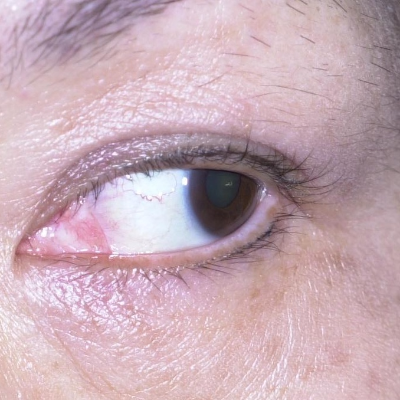

In [96]:
img_list = os.listdir('/content/drive/My Drive/Deep_learning/eyelid_images/out')
print(img_list)
img = cv2.imread('/content/drive/My Drive/Deep_learning/eyelid_images/out/'+img_list[2])


#アスペクト比を維持したまま横を400pixelに縮小する
def scale_to_width(img, width):
    scale = width / img.shape[1]
    return cv2.resize(img, dsize=None, fx=scale, fy=scale)
dst = scale_to_width(img, 400)

#図を表示する
cv2_imshow(dst)